In [74]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import re
from tweepy import OAuthHandler
from timeit import default_timer as timer
import datetime
import matplotlib.pyplot as plt

In [2]:
twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = url.split("/")[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, mode="wb") as file:
        file.write(response.content)

In [5]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
image_predictions


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '_______'
consumer_secret = '____'
access_token = '_______'
access_secret = '______'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
df_list = []
with open('tweet_json.txt','r') as f:
    for line in f:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']        
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
df_api = pd.DataFrame(df_list)
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6970,33697
1,892177421306343426,5272,29226
2,891815181378084864,3464,21976
3,891689557279858688,7191,36793
4,891327558926688256,7718,35185


### ASSESSING DATA

#### The twitter archive enhanced data
We begin to assess the data for quality or tidiness issues visually or programmatically

In [9]:
twitter_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1364,702899151802126337,NaN,NaN,2016-02-25 16:53:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to Luna. Her tongue is malfunctionin...,NaN,NaN,NaN,https://vine.co/v/i6iIrBwnTFI,12,10,Luna,None,None,None,None
1703,680913438424612864,NaN,NaN,2015-12-27 00:49:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Griswold. He's dapper as hell. Already pu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680913438...,11,10,Griswold,None,None,None,None
2127,670319130621435904,NaN,NaN,2015-11-27 19:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670319130...,11,10,None,None,None,None,None
1584,687096057537363968,NaN,NaN,2016-01-13 02:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper's New Year's resolution was to bec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687096057...,11,10,None,None,None,pupper,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
1599,686034024800862208,NaN,NaN,2016-01-10 03:57:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Your fav crew is back and this time they're em...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686034024...,12,10,None,None,None,None,None
367,828770345708580865,NaN,NaN,2017-02-07 01:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's your Lyft for tonight. Kin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345...,13,10,Alfie,None,None,None,None
1509,691459709405118465,NaN,NaN,2016-01-25 03:16:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Leo. He's a Fallopian Puffalope. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691459709...,12,10,Leo,None,None,None,None
569,801958328846974976,NaN,NaN,2016-11-25 01:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ronnie. He hopes you're having a great...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,None,None,None,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None


In [10]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
for columns in twitter_enhanced:
    print(f"{columns} Value Counts:")
    
    print(twitter_enhanced[columns].value_counts())
    

tweet_id Value Counts:
892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64
in_reply_to_status_id Value Counts:
6.671522e+17    2
8.862664e+17    1
6.920419e+17    1
6.827884e+17    1
6.842229e+17    1
               ..
8.116272e+17    1
8.131273e+17    1
8.211526e+17    1
8.233264e+17    1
6.670655e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64
in_reply_to_user_id Value Counts:
4.196984e+09    47
2.195506e+07     2
2.281182e+09     1
1.132119e+08     1
1.637468e+07     1
4.670367e+08     1
1.198989e+09     1
2.878549e+07     1
2.319108e+09     1
3.589728e+08     1
4.717297e+09     1
1.584641e+07     1
7.305050e+17     1
2.916630e+07     1
2.918590e+08     1
1.185634e+07     1
2.068372e+07     1
1.582854e+09     1
4.7384

In [12]:
sum(twitter_enhanced.duplicated())

0

In [13]:
for columns in twitter_enhanced:
    print(f"{columns} Duplicate Values:")
    
    print(sum(twitter_enhanced[columns].duplicated(keep='last')))

tweet_id Duplicate Values:
0
in_reply_to_status_id Duplicate Values:
2278
in_reply_to_user_id Duplicate Values:
2324
timestamp Duplicate Values:
0
source Duplicate Values:
2352
text Duplicate Values:
0
retweeted_status_id Duplicate Values:
2174
retweeted_status_user_id Duplicate Values:
2330
retweeted_status_timestamp Duplicate Values:
2174
expanded_urls Duplicate Values:
137
rating_numerator Duplicate Values:
2316
rating_denominator Duplicate Values:
2338
name Duplicate Values:
1399
doggo Duplicate Values:
2354
floofer Duplicate Values:
2354
pupper Duplicate Values:
2354
puppo Duplicate Values:
2354


These are the issues gotten from the assessment:

**Quality**
1. The expanded_url has missing values
2. Duplicated values in the dataset
3. The retweeted tweets on the dataset 
4. The replied tweets causing incorrect values on the dataset
5. Invalid numerators and denominators
4. Source is not well arranged
5. Naming Issue

**Tidiness**
1. timestamp is not in the right format
2. dog_stage should be on one column
3. Merging with api column


    

### Image Predictions

In [14]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
228,670385711116361728,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True
769,689283819090870273,https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg,1,Scotch_terrier,0.267979,True,affenpinscher,0.199619,True,cairn,0.127469,True
1821,834574053763584002,https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg,1,toilet_tissue,0.262936,False,golden_retriever,0.226564,True,bathtub,0.078879,False
675,683449695444799489,https://pbs.twimg.com/media/CXwZ3pbWsAAriTv.jpg,1,Lakeland_terrier,0.303512,True,soft-coated_wheaten_terrier,0.211424,True,golden_retriever,0.170725,True
611,680115823365742593,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1,pug,0.999365,True,French_bulldog,0.000544,True,Boston_bull,0.000028,True
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
1688,815390420867969024,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,restaurant,0.279846,False,toyshop,0.091429,False,paper_towel,0.046147,False
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
825,693262851218264065,https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg,1,golden_retriever,0.989333,True,Labrador_retriever,0.007946,True,kuvasz,0.000749,True


In [15]:
for columns in image_predictions:
    print(f"{columns} Value Counts:")
    
    print(image_predictions[columns].value_counts())

tweet_id Value Counts:
666020888022790149    1
761292947749015552    1
767122157629476866    1
766793450729734144    1
766693177336135680    1
                     ..
684097758874210310    1
683857920510050305    1
683852578183077888    1
683849932751646720    1
892420643555336193    1
Name: tweet_id, Length: 2075, dtype: int64
jpg_url Value Counts:
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                           

In [16]:
for columns in image_predictions:
    print(f"{columns} Duplicate Values:")
    
    print(sum(image_predictions[columns].duplicated(keep='last')))

tweet_id Duplicate Values:
0
jpg_url Duplicate Values:
66
img_num Duplicate Values:
2071
p1 Duplicate Values:
1697
p1_conf Duplicate Values:
69
p1_dog Duplicate Values:
2073
p2 Duplicate Values:
1670
p2_conf Duplicate Values:
71
p2_dog Duplicate Values:
2073
p3 Duplicate Values:
1667
p3_conf Duplicate Values:
69
p3_dog Duplicate Values:
2073


These are the issues gotten from the assessment:

**Quality**

1. Missing values in the dataset compared to the Twitter enhanced data


**Tidiness**
1. Incomplete without the archive enhanced data
2. Confidence values in one Column

### Cleaning the Data

In [17]:
twitter_enhanced_copy = twitter_enhanced.copy()
image_predictions_copy = image_predictions.copy()
df_api_copy = df_api.copy()

### Twitter archive enhanced
### Quality
1. **Missing values in Expanded_urls**

Most of the tweets are either replies or retweets to a tweet.

**Define**

Remove all rows that have null expanded url values

**Code**

In [18]:
twitter_enhanced_copy[twitter_enhanced_copy['expanded_urls'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 30 to 2298
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    59 non-null     int64  
 1   in_reply_to_status_id       55 non-null     float64
 2   in_reply_to_user_id         55 non-null     float64
 3   timestamp                   59 non-null     object 
 4   source                      59 non-null     object 
 5   text                        59 non-null     object 
 6   retweeted_status_id         1 non-null      float64
 7   retweeted_status_user_id    1 non-null      float64
 8   retweeted_status_timestamp  1 non-null      object 
 9   expanded_urls               0 non-null      object 
 10  rating_numerator            59 non-null     int64  
 11  rating_denominator          59 non-null     int64  
 12  name                        59 non-null     object 
 13  doggo                       59 non

In [19]:
twitter_enhanced_copy = twitter_enhanced_copy[twitter_enhanced_copy['expanded_urls'].notna()]

**Test**

The Missing Values have been succesfully removed.

In [20]:
twitter_enhanced_copy.isna().sum()

tweet_id                         0
in_reply_to_status_id         2274
in_reply_to_user_id           2274
timestamp                        0
source                           0
text                             0
retweeted_status_id           2117
retweeted_status_user_id      2117
retweeted_status_timestamp    2117
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
twitter_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

2. **Duplicate values in the dataset**

**Define**

* Clean expanded url duplicates that have RT at the beginning of the text.

**Code**

In [22]:
twitter_enhanced_copy = twitter_enhanced_copy[~((twitter_enhanced_copy['expanded_urls'].duplicated(keep='last')) & (twitter_enhanced_copy['retweeted_status_id'].notna()))]

In [23]:
twitter_enhanced_copy.drop_duplicates(subset=['expanded_urls'],inplace=True)

**Test**

In [24]:
twitter_enhanced_copy['expanded_urls'].duplicated().sum()

0

3. **Replied Columns**

**DEFINE**

* Drop replied columns in the dataset using `drop` method

**CODE**

In [25]:
twitter_enhanced_copy = twitter_enhanced_copy[~(twitter_enhanced_copy['in_reply_to_status_id'].notna())]

In [26]:
twitter_enhanced_copy.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

**TEST**

In [27]:
twitter_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2195 non-null   int64  
 1   timestamp                   2195 non-null   object 
 2   source                      2195 non-null   object 
 3   text                        2195 non-null   object 
 4   retweeted_status_id         102 non-null    float64
 5   retweeted_status_user_id    102 non-null    float64
 6   retweeted_status_timestamp  102 non-null    object 
 7   expanded_urls               2195 non-null   object 
 8   rating_numerator            2195 non-null   int64  
 9   rating_denominator          2195 non-null   int64  
 10  name                        2195 non-null   object 
 11  doggo                       2195 non-null   object 
 12  floofer                     2195 non-null   object 
 13  pupper                      2195 

4. **Retweeted Columns**

**DEFINE**

* Remove all the retweeted columns in the dataset and remove all retweets related columns.

**CODE**

In [28]:
twitter_enhanced_copy = twitter_enhanced_copy[~(twitter_enhanced_copy['retweeted_status_id'].notna())]

In [29]:
twitter_enhanced_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

**TEST**

In [30]:
twitter_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2093 non-null   int64 
 1   timestamp           2093 non-null   object
 2   source              2093 non-null   object
 3   text                2093 non-null   object
 4   expanded_urls       2093 non-null   object
 5   rating_numerator    2093 non-null   int64 
 6   rating_denominator  2093 non-null   int64 
 7   name                2093 non-null   object
 8   doggo               2093 non-null   object
 9   floofer             2093 non-null   object
 10  pupper              2093 non-null   object
 11  puppo               2093 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.6+ KB


5. **Numerator Values**

**DEFINE**
* Change invalid numerator values to the correct value and denominators to 10

**CODE**

In [31]:
invalid_ratings = twitter_enhanced_copy[twitter_enhanced_copy['text'].str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for text in invalid_ratings:
    x = twitter_enhanced_copy['text']== text
    twitter_enhanced_copy.loc[x, 'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", text)
    twitter_enhanced_copy.loc[x, 'rating_denominator'] = 10

C:\Users\HP\AppData\Local\Temp\ipykernel_12508\1559345032.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  invalid_ratings = twitter_enhanced_copy[twitter_enhanced_copy['text'].str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text


In [32]:
twitter_enhanced_copy[twitter_enhanced_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]


C:\Users\HP\AppData\Local\Temp\ipykernel_12508\2534952776.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_enhanced_copy[twitter_enhanced_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [33]:
ratings = twitter_enhanced_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
twitter_enhanced_copy.rating_numerator = ratings[0]

**TEST**

In [34]:
twitter_enhanced_copy[twitter_enhanced_copy['text'].isin(invalid_ratings)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
766,777684233540206592,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
1007,747600769478692864,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,10,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,10,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,10,Bluebert,None,None,None,None
1222,714258258790387713,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,10,10,Travis,None,None,None,None
1359,703356393781329922,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,None,None,None,None
1459,695064344191721472,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,4,10,None,None,None,None,None
1465,694352839993344000,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,None,None,None,None
1508,691483041324204033,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,5,10,None,None,None,None,None


In [35]:
twitter_enhanced_copy[twitter_enhanced_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]


C:\Users\HP\AppData\Local\Temp\ipykernel_12508\2534952776.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_enhanced_copy[twitter_enhanced_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


6. **Source Reformating**

**DEFINE**

Remove the html tags from the string and leave the content.

**CODE**

In [36]:
twitter_enhanced_copy['source'] = twitter_enhanced_copy['source'].str.extract(r'>(.*)<')

**TEST**


In [37]:

twitter_enhanced_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


7. **Naming Issues** 

**DEFINE**

Correct the invalid names to None.

**CODE**

In [38]:
twitter_enhanced_copy.name = twitter_enhanced_copy.name.str.replace('^[a-z]+', 'None')

C:\Users\HP\AppData\Local\Temp\ipykernel_12508\364310229.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_enhanced_copy.name = twitter_enhanced_copy.name.str.replace('^[a-z]+', 'None')


In [39]:
twitter_enhanced_copy.name.value_counts()

None          703
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

### Tidiness

1. **Timestamp format**

**DEFINE**

* Change the timestamp format to datetime using `to_datetime`.

**CODE**

In [40]:
twitter_enhanced_copy['timestamp'] = pd.to_datetime(twitter_enhanced_copy['timestamp'])

**DEFINE**

In [41]:
twitter_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   object             
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   doggo               2093 non-null   object             
 9   floofer             2093 non-null   object             
 10  pupper              2093 non-null   object             
 11  puppo               2093 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

2. **DOG_STAGE**

**DEFINE**
* Melt the puppo, doggo, floofer and pupper columns into one column called dog_stage and drop the variable column and the dupliactes of the dog_stage column

**CODE**

In [42]:
twitter_enhanced_copy = pd.melt(twitter_enhanced_copy, id_vars=["tweet_id","timestamp","text","source","rating_numerator" ,"rating_denominator","expanded_urls","name"],value_name="dog_stage")

In [43]:
twitter_enhanced_copy.drop(['variable'],axis=1,inplace=True)

In [44]:
twitter_enhanced_copy = twitter_enhanced_copy.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

**TEST**

In [45]:
twitter_enhanced_copy['dog_stage'].value_counts()

None       1758
pupper      229
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

3. **Merge with Dataframe API**

**DEFINE**

* Join the enhanced_archive dataframe with the api dataframe using `merge` with the tweet_id as the common point


**CODE**

In [46]:
master_df = pd.merge(twitter_enhanced_copy,df_api_copy,on=['tweet_id'],how='inner')

**TEST**

In [47]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2072 non-null   int64              
 1   timestamp           2072 non-null   datetime64[ns, UTC]
 2   text                2072 non-null   object             
 3   source              2072 non-null   object             
 4   rating_numerator    2072 non-null   object             
 5   rating_denominator  2072 non-null   int64              
 6   expanded_urls       2072 non-null   object             
 7   name                2072 non-null   object             
 8   dog_stage           2072 non-null   object             
 9   retweet_count       2072 non-null   int64              
 10  favorite_count      2072 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 194.2+ KB


In [48]:
master_df.head()

,tweet_id,timestamp,text,source,rating_numerator,rating_denominator,expanded_urls,name,dog_stage,retweet_count,favorite_count
0,667435689202614272,2015-11-19 20:14:03+00:00,Ermergerd 12/10 https://t.co/PQni2sjPsm,Twitter for iPhone,12,10,https://twitter.com/dog_rates/status/667435689...,None,None,76,267
1,667437278097252352,2015-11-19 20:20:22+00:00,Never seen this breed before. Very pointy pup....,Twitter for iPhone,10,10,https://twitter.com/dog_rates/status/667437278...,None,None,197,396
2,667443425659232256,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,Twitter for iPhone,6,10,https://twitter.com/dog_rates/status/667443425...,None,None,486,681
3,667453023279554560,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,Twitter Web Client,11,10,https://twitter.com/dog_rates/status/667453023...,Cupcake,None,73,279
4,667455448082227200,2015-11-19 21:32:34+00:00,This is Reese and Twips. Reese protects Twips....,Twitter Web Client,7,10,https://twitter.com/dog_rates/status/667455448...,Reese,None,53,171


## Image Predictions
### Quality 

1. Confidence level on One column

**DEFINE**

Add the best confodence level of the predictions for a dog on one column and delete the remaining columns

**CODE**

In [49]:
predicted = []
confidence_level = []

def predicted_func(dataframe):
    if dataframe['p1_dog'] == True:
        predicted.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predicted.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predicted.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predicted.append('NaN')
        confidence_level.append(0)

image_predictions_copy.apply(predicted_func, axis=1)
image_predictions_copy['predicted'] = predicted
image_predictions_copy['confidence_level'] = confidence_level



In [50]:
image_predictions_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'predicted',
       'confidence_level'],
      dtype='object')

In [51]:
image_predictions_copy.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1,inplace=True)

**TEST**

In [52]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   int64  
 1   jpg_url           2075 non-null   object 
 2   predicted         2075 non-null   object 
 3   confidence_level  2075 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


In [53]:
image_predictions_copy.head()

,tweet_id,jpg_url,predicted,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Tidiness

1. **Merge with master dataframe**

**DEFINE**

Merge the image predictions dataframe to the master datframe with the `merge`.

**CODE**

In [54]:
master_df = pd.merge(master_df,image_predictions_copy,on=['tweet_id'],how='inner')

**TEST**

In [55]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1952 non-null   int64              
 1   timestamp           1952 non-null   datetime64[ns, UTC]
 2   text                1952 non-null   object             
 3   source              1952 non-null   object             
 4   rating_numerator    1952 non-null   object             
 5   rating_denominator  1952 non-null   int64              
 6   expanded_urls       1952 non-null   object             
 7   name                1952 non-null   object             
 8   dog_stage           1952 non-null   object             
 9   retweet_count       1952 non-null   int64              
 10  favorite_count      1952 non-null   int64              
 11  jpg_url             1952 non-null   object             
 12  predicted           1952 non-null 

In [56]:
master_df.head()

,tweet_id,timestamp,text,source,rating_numerator,rating_denominator,expanded_urls,name,dog_stage,retweet_count,favorite_count,jpg_url,predicted,confidence_level
0,667435689202614272,2015-11-19 20:14:03+00:00,Ermergerd 12/10 https://t.co/PQni2sjPsm,Twitter for iPhone,12,10,https://twitter.com/dog_rates/status/667435689...,None,None,76,267,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091
1,667437278097252352,2015-11-19 20:20:22+00:00,Never seen this breed before. Very pointy pup....,Twitter for iPhone,10,10,https://twitter.com/dog_rates/status/667437278...,None,None,197,396,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,NaN,0.000000
2,667443425659232256,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,Twitter for iPhone,6,10,https://twitter.com/dog_rates/status/667443425...,None,None,486,681,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NaN,0.000000
3,667453023279554560,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,Twitter Web Client,11,10,https://twitter.com/dog_rates/status/667453023...,Cupcake,None,73,279,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670
4,667455448082227200,2015-11-19 21:32:34+00:00,This is Reese and Twips. Reese protects Twips....,Twitter Web Client,7,10,https://twitter.com/dog_rates/status/667455448...,Reese,None,53,171,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376


**Final touches**

* The formats of the numerator and denominator should be in float
* The tweet id should be an  object to prevent further access
* The ratio of the numerator and the denominator


In [57]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1952 non-null   int64              
 1   timestamp           1952 non-null   datetime64[ns, UTC]
 2   text                1952 non-null   object             
 3   source              1952 non-null   object             
 4   rating_numerator    1952 non-null   object             
 5   rating_denominator  1952 non-null   int64              
 6   expanded_urls       1952 non-null   object             
 7   name                1952 non-null   object             
 8   dog_stage           1952 non-null   object             
 9   retweet_count       1952 non-null   int64              
 10  favorite_count      1952 non-null   int64              
 11  jpg_url             1952 non-null   object             
 12  predicted           1952 non-null 

In [58]:
master_df['rating_denominator'] = master_df['rating_denominator'].astype(float)
master_df['rating_numerator'] = master_df['rating_numerator'].astype(float)
master_df['tweet_id'] = master_df['tweet_id'].astype(str)

In [59]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1952 non-null   object             
 1   timestamp           1952 non-null   datetime64[ns, UTC]
 2   text                1952 non-null   object             
 3   source              1952 non-null   object             
 4   rating_numerator    1952 non-null   float64            
 5   rating_denominator  1952 non-null   float64            
 6   expanded_urls       1952 non-null   object             
 7   name                1952 non-null   object             
 8   dog_stage           1952 non-null   object             
 9   retweet_count       1952 non-null   int64              
 10  favorite_count      1952 non-null   int64              
 11  jpg_url             1952 non-null   object             
 12  predicted           1952 non-null 

In [60]:
master_df['rating_ratio'] = master_df['rating_numerator'] / master_df['rating_denominator']

In [61]:
master_df

,tweet_id,timestamp,text,source,rating_numerator,rating_denominator,expanded_urls,name,dog_stage,retweet_count,favorite_count,jpg_url,predicted,confidence_level,rating_ratio
0,667435689202614272,2015-11-19 20:14:03+00:00,Ermergerd 12/10 https://t.co/PQni2sjPsm,Twitter for iPhone,12.0,10.0,https://twitter.com/dog_rates/status/667435689...,None,None,76,267,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,1.2
1,667437278097252352,2015-11-19 20:20:22+00:00,Never seen this breed before. Very pointy pup....,Twitter for iPhone,10.0,10.0,https://twitter.com/dog_rates/status/667437278...,None,None,197,396,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,NaN,0.000000,1.0
2,667443425659232256,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,Twitter for iPhone,6.0,10.0,https://twitter.com/dog_rates/status/667443425...,None,None,486,681,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NaN,0.000000,0.6
3,667453023279554560,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,Twitter Web Client,11.0,10.0,https://twitter.com/dog_rates/status/667453023...,Cupcake,None,73,279,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670,1.1
4,667455448082227200,2015-11-19 21:32:34+00:00,This is Reese and Twips. Reese protects Twips....,Twitter Web Client,7.0,10.0,https://twitter.com/dog_rates/status/667455448...,Reese,None,53,171,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,825535076884762624,2017-01-29 02:44:34+00:00,Here's a very loving and accepting puppo. Appe...,Twitter for iPhone,14.0,10.0,https://twitter.com/dog_rates/status/825535076...,None,puppo,16303,53818,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,Rottweiler,0.681495,1.4
1948,825026590719483904,2017-01-27 17:04:02+00:00,Say hello to Pablo. He's one gorgeous puppo. A...,Twitter for iPhone,12.0,10.0,https://www.gofundme.com/my-puppys-double-cata...,Pablo,puppo,1165,5889,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,Eskimo_dog,0.524454,1.2
1949,819952236453363712,2017-01-13 17:00:21+00:00,This is Oliver. He has dreams of being a servi...,Twitter for iPhone,13.0,10.0,"https://www.gofundme.com/servicedogoliver,http...",Oliver,puppo,1079,5005,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,American_Staffordshire_terrier,0.925505,1.3
1950,889531135344209921,2017-07-24 17:02:04+00:00,This is Stuart. He's sporting his favorite fan...,Twitter for iPhone,13.0,10.0,https://twitter.com/dog_rates/status/889531135...,Stuart,puppo,1874,13313,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,1.3


### Storing the data

In [62]:
master_df.to_csv('twitter_archive_master.csv', index=False)

### Analyzing and Visualizing data

In [63]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1952 non-null   object             
 1   timestamp           1952 non-null   datetime64[ns, UTC]
 2   text                1952 non-null   object             
 3   source              1952 non-null   object             
 4   rating_numerator    1952 non-null   float64            
 5   rating_denominator  1952 non-null   float64            
 6   expanded_urls       1952 non-null   object             
 7   name                1952 non-null   object             
 8   dog_stage           1952 non-null   object             
 9   retweet_count       1952 non-null   int64              
 10  favorite_count      1952 non-null   int64              
 11  jpg_url             1952 non-null   object             
 12  predicted           1952 non-null 

In [64]:
master_df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level,rating_ratio
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,12.191486,10.459529,2253.782787,7749.200820,0.465115,1.167831
std,41.808556,6.821920,4029.504007,11412.254254,0.339713,4.108568
min,0.000000,7.000000,11.000000,66.000000,0.000000,0.000000
25%,10.000000,10.000000,493.750000,1625.500000,0.140107,1.000000
50%,11.000000,10.000000,1083.500000,3472.500000,0.459559,1.100000
75%,12.000000,10.000000,2577.750000,9681.000000,0.776453,1.200000
max,1776.000000,170.000000,70338.000000,144267.000000,0.999956,177.600000


In [65]:
master_df.head()

,tweet_id,timestamp,text,source,rating_numerator,rating_denominator,expanded_urls,name,dog_stage,retweet_count,favorite_count,jpg_url,predicted,confidence_level,rating_ratio
0,667435689202614272,2015-11-19 20:14:03+00:00,Ermergerd 12/10 https://t.co/PQni2sjPsm,Twitter for iPhone,12.0,10.0,https://twitter.com/dog_rates/status/667435689...,None,None,76,267,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,1.2
1,667437278097252352,2015-11-19 20:20:22+00:00,Never seen this breed before. Very pointy pup....,Twitter for iPhone,10.0,10.0,https://twitter.com/dog_rates/status/667437278...,None,None,197,396,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,NaN,0.000000,1.0
2,667443425659232256,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,Twitter for iPhone,6.0,10.0,https://twitter.com/dog_rates/status/667443425...,None,None,486,681,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NaN,0.000000,0.6
3,667453023279554560,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,Twitter Web Client,11.0,10.0,https://twitter.com/dog_rates/status/667453023...,Cupcake,None,73,279,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670,1.1
4,667455448082227200,2015-11-19 21:32:34+00:00,This is Reese and Twips. Reese protects Twips....,Twitter Web Client,7.0,10.0,https://twitter.com/dog_rates/status/667455448...,Reese,None,53,171,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,0.7


In [71]:
monthly_tweets = master_df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()[['timestamp','tweet_id']]

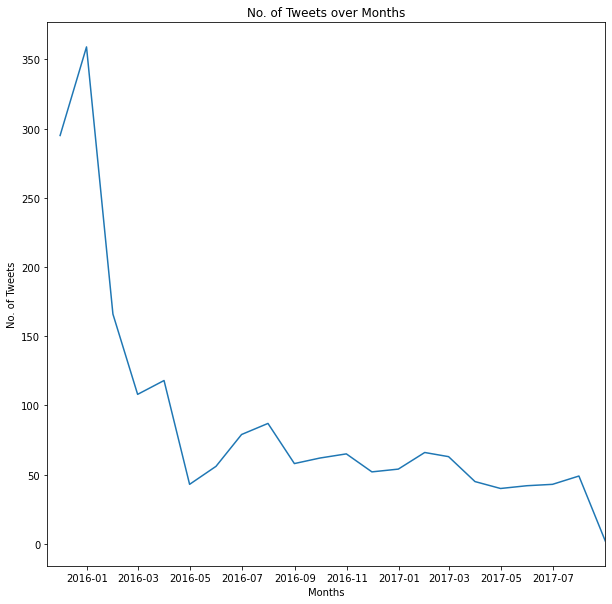

In [86]:
plt.figure(figsize=(10,10))

plt.xlim([datetime.date(2015, 11, 15), datetime.date(2017, 8, 31)]);

plt.xlabel("Months")

plt.ylabel("No. of Tweets")

plt.title('No. of Tweets over Months')

plt.plot(monthly_tweets.timestamp,monthly_tweets.tweet_id);

The number of tweets reduced from 2015 to 2017.

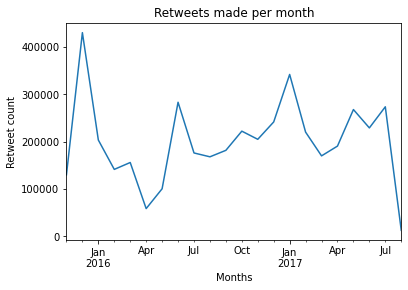

In [115]:
master_df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).sum()['retweet_count'].plot();
plt.ylabel('Retweet count')
plt.xlabel('Months')
plt.title('Retweets made per month');

In [93]:
master_df.groupby(['predicted']).mean()['rating_ratio'].sort_values()

predicted
Japanese_spaniel               0.500000
soft-coated_wheaten_terrier    0.850000
Scotch_terrier                 0.900000
Walker_hound                   0.900000
Tibetan_terrier                0.925000
                                 ...   
briard                         1.233333
Saluki                         1.250000
Bouvier_des_Flandres           1.300000
Siberian_husky                 1.342105
NaN                            1.618482
Name: rating_ratio, Length: 114, dtype: float64

From this analysis, the Siberian husky is the highest rated dog on the WeRateDogs Twitter archive while the Japanese Spaniel is the lowest rated.


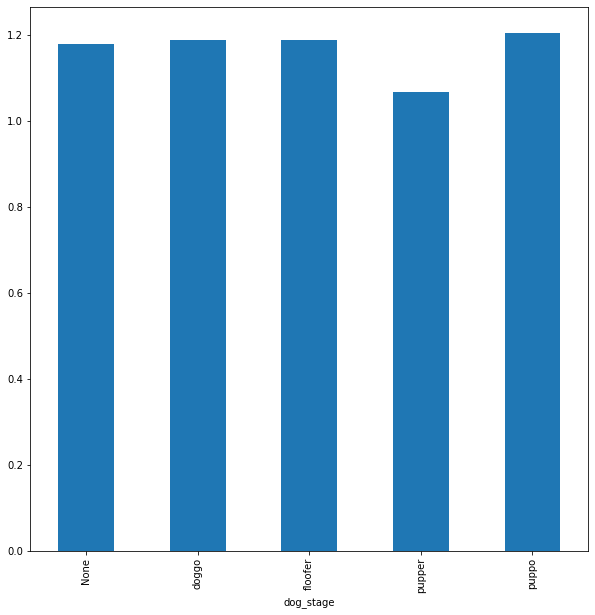

In [105]:
master_df.groupby(['dog_stage']).mean()['rating_ratio'].plot(kind='bar',figsize=(10,10));

Puppo stage has the highest rating while the pupper has the lowest rating.

In [102]:
master_df.predicted.nunique()

114

There are over 100 breeds of dogs in the image predictions and also of objects.

In [104]:
master_df.corr()

,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level,rating_ratio
rating_numerator,1.000000,0.184943,0.018678,0.016425,-0.022607,0.982526
rating_denominator,0.184943,1.000000,-0.016731,-0.023732,0.001944,-0.000838
retweet_count,0.018678,-0.016731,1.000000,0.928448,0.027492,0.022070
favorite_count,0.016425,-0.023732,0.928448,1.000000,0.071568,0.021067
confidence_level,-0.022607,0.001944,0.027492,0.071568,1.000000,-0.022793
rating_ratio,0.982526,-0.000838,0.022070,0.021067,-0.022793,1.000000
